In [1]:
import pandas as pd #import needed libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path='C:/Users/AIRYOLK NIGERIA LTD/Desktop/car_financing.csv' #loading CSV file
df=pd.read_csv(file_path)
df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna
...,...,...,...,...,...,...,...,...,...
403,56,3951.11,796.01,9.54,786.47,3164.64,60,0.0290,VW Golf R
404,57,3164.64,796.01,7.64,788.37,2376.27,60,0.0290,VW Golf R
405,58,2376.27,796.01,5.74,790.27,1586.00,60,0.0290,VW Golf R
406,59,1586.00,796.01,3.83,792.18,793.82,60,0.0290,VW Golf R


In [3]:
df.head() #print top 5 rows

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [4]:
df.tail()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
403,56,3951.11,796.01,9.54,786.47,3164.64,60,0.029,VW Golf R
404,57,3164.64,796.01,7.64,788.37,2376.27,60,0.029,VW Golf R
405,58,2376.27,796.01,5.74,790.27,1586.00,60,0.029,VW Golf R
406,59,1586.00,796.01,3.83,792.18,793.82,60,0.029,VW Golf R
407,60,793.82,796.01,1.91,794.10,-0.28,60,0.029,VW Golf R


## DATA WRANGLING-CHECK SLIDE ON DEALING WITH MISSING DATA
ASSESS DATA
a. what data do you have
b.Check validity of the data

In [5]:
#check for improver conversion of data type
df.dtypes

Month                 int64
Starting Balance    float64
Repayment           float64
Interest Paid       float64
Principal Paid      float64
New Balance         float64
term                  int64
interest_rate       float64
car_type             object
dtype: object

In [6]:
#shape of the data
df.shape

(408, 9)

In [7]:
#statistical summary, note it didnt add car type because its a string
df.describe()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,26.970588,17562.870343,712.134118,56.715123,655.418995,16907.451348,52.941176,0.039603
std,16.207776,11224.423084,247.447947,40.775353,245.361625,11168.974693,9.268926,0.013414
min,1.000000,395.410000,396.820000,1.280000,326.620000,-0.490000,36.000000,0.029000
25%,13.000000,8557.900000,486.740000,26.257500,476.972500,7832.080000,48.000000,0.029000
50%,26.000000,16262.230000,661.995000,50.640000,598.135000,15539.305000,60.000000,0.037450
75%,39.250000,25285.055000,796.010000,76.357500,760.790000,24535.925000,60.000000,0.039000
max,60.000000,44409.600000,1289.530000,202.930000,1286.430000,43720.910000,60.000000,0.070200


In [8]:
#get the wholistic view of the data to check for data collection error
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             408 non-null    int64  
 1   Starting Balance  408 non-null    float64
 2   Repayment         408 non-null    float64
 3   Interest Paid     408 non-null    float64
 4   Principal Paid    408 non-null    float64
 5   New Balance       408 non-null    float64
 6   term              408 non-null    int64  
 7   interest_rate     408 non-null    float64
 8   car_type          408 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 28.8+ KB


In [9]:
df[['car_type']].tail() #bottom car types

,car_type
403,VW Golf R
404,VW Golf R
405,VW Golf R
406,VW Golf R
407,VW Golf R


In [10]:
df[['car_type','interest_rate']].tail() #bottom car types

,car_type,interest_rate
403,VW Golf R,0.029
404,VW Golf R,0.029
405,VW Golf R,0.029
406,VW Golf R,0.029
407,VW Golf R,0.029


## Data Cleaning

In [11]:
#renaming columns, reassign df.rename to df to modify changes QUIZ: who can tell us the type of data within the curly bracket
#rename the columns
df=df.rename(columns={'Starting Balance': 'starting_balance','Interest Paid':'interest_paid','Principal Paid':'principal_paid', 'New Balance':'new_balance'})
df.head()

,Month,starting_balance,Repayment,interest_paid,principal_paid,new_balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [12]:
df=df.drop(columns=['term'])#delete not needed column
df.head(20)

,Month,starting_balance,Repayment,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,0.0702,Toyota Sienna
5,6,32239.97,687.23,188.60,498.63,31741.34,0.0702,Toyota Sienna
6,7,31741.34,687.23,185.68,501.55,31239.79,0.0702,Toyota Sienna
7,8,31239.79,687.23,182.75,504.48,30735.31,0.0702,Toyota Sienna
8,9,30735.31,687.23,179.80,507.43,30227.88,0.0702,Toyota Sienna
9,10,30227.88,687.23,176.83,510.40,29717.48,0.0702,Toyota Sienna


In [13]:
df=df.drop(columns=['Repayment'])#delete not needed column
df.head(20)

,Month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna
5,6,32239.97,188.60,498.63,31741.34,0.0702,Toyota Sienna
6,7,31741.34,185.68,501.55,31239.79,0.0702,Toyota Sienna
7,8,31239.79,182.75,504.48,30735.31,0.0702,Toyota Sienna
8,9,30735.31,179.80,507.43,30227.88,0.0702,Toyota Sienna
9,10,30227.88,176.83,510.40,29717.48,0.0702,Toyota Sienna


## EXPLORATORY DATA ANALYSIS

In [14]:
df['car_type'].value_counts()

VW Golf R         144
Toyota Sienna     120
Toyota Carolla    111
Toyota Corolla     33
Name: car_type, dtype: int64

In [15]:
df['interest_rate'].value_counts()

0.0390    144
0.0290    144
0.0702     60
0.0359     60
Name: interest_rate, dtype: int64

<AxesSubplot:>

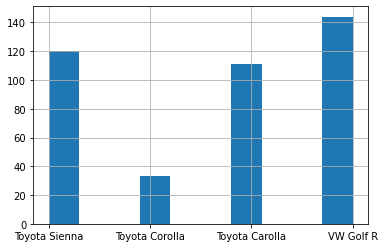

In [16]:
df['car_type'].hist() #vw golf R was higly patronised

<AxesSubplot:>

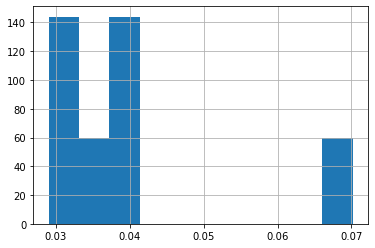

In [17]:
df['interest_rate'].hist() #0.3 and 0.4 was higly patronised

## Let's work with toyota Sienna and interest rate of 0.0702

In [19]:
toyota=df['car_type']=='Toyota Sienna' #let's work with toyota sienna
df[toyota].head() #lets produce a data frame for only toyota

,Month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna


In [20]:
#so our new df will be defined as;
df=df[toyota]
df

,Month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna
...,...,...,...,...,...,...,...
115,56,3133.83,9.37,623.10,2510.73,0.0359,Toyota Sienna
116,57,2510.73,7.51,624.96,1885.77,0.0359,Toyota Sienna
117,58,1885.77,5.64,626.83,1258.94,0.0359,Toyota Sienna
118,59,1258.94,3.76,628.71,630.23,0.0359,Toyota Sienna


In [21]:
df['car_type'].value_counts() #count the number of characters in the car type

Toyota Sienna    120
Name: car_type, dtype: int64

In [22]:
df['interest_rate'].value_counts() #count the number of characters or entries for each interest rate value

0.0702    60
0.0359    60
Name: interest_rate, dtype: int64

In [25]:
interest_high=df['interest_rate']==0.0702 #assign the higher value to interest high, since thats what you want to make analysis with

In [26]:
df=df[interest_high]
df #check to see that its all 0.0702

,Month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna
5,6,32239.97,188.60,498.63,31741.34,0.0702,Toyota Sienna
6,7,31741.34,185.68,501.55,31239.79,0.0702,Toyota Sienna
7,8,31239.79,182.75,504.48,30735.31,0.0702,Toyota Sienna
8,9,30735.31,179.80,507.43,30227.88,0.0702,Toyota Sienna
9,10,30227.88,176.83,510.40,29717.48,0.0702,Toyota Sienna


In [27]:
df['interest_rate'].value_counts() #count again to be sure it's 60

0.0702    60
Name: interest_rate, dtype: int64

## Checking for missing data
in pandas missing values are called NAN or None

## missing data can be in the following form in your data set
not applicableZero*False

In [28]:
df['principal_paid'].isnull().sum() #check to see if principal paid has a null/nan value

0

In [29]:
null_values = df.isnull().sum() #check to see if any of the entries have a null/nan value
null_values

Month               0
starting_balance    0
interest_paid       0
principal_paid      0
new_balance         0
interest_rate       0
car_type            0
dtype: int64

In [30]:
#sum of value in the column  #get the sum of the principal paid entries/values
df['principal_paid'].sum()

34690.28999999999

In [31]:
#sum the values of all columns
df.sum()

Month                                                            1830
starting_balance                                           1118598.13
interest_paid                                                 6543.51
principal_paid                                               34690.29
new_balance                                                1083907.84
interest_rate                                                   4.212
car_type            Toyota SiennaToyota SiennaToyota SiennaToyota ...
dtype: object

## data visualization

In [32]:
#you can also check make sure no nan value in your data before plotting by using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             60 non-null     int64  
 1   starting_balance  60 non-null     float64
 2   interest_paid     60 non-null     float64
 3   principal_paid    60 non-null     float64
 4   new_balance       60 non-null     float64
 5   interest_rate     60 non-null     float64
 6   car_type          60 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ KB


In [33]:
#let's turn our pandas series to a numpy array using values (numerical array)
month_value = df.loc[:, 'Month'].values
interest_paid_value = df.loc[:, 'interest_paid'].values
principal_paid_value = df.loc[:, 'principal_paid'].values

In [34]:
month_value

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [35]:
type(month_value) #let's check if it converted to numpy array

numpy.ndarray

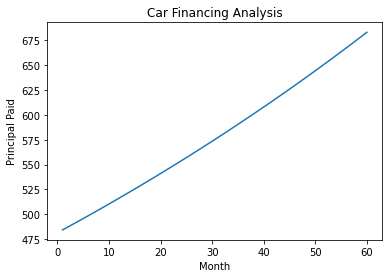

In [39]:
plt.title('Car Financing Analysis')
plt.xlabel('Month')
plt.ylabel('Principal Paid')
plt.plot(month_value,principal_paid_value)

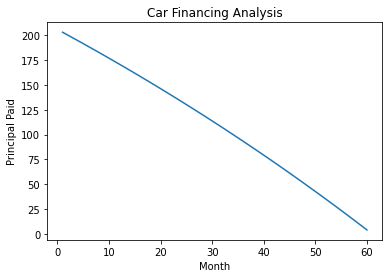

In [38]:
plt.title('Car Financing Analysis')
plt.xlabel('Month')
plt.ylabel('Principal Paid')
plt.plot(month_value,interest_paid_value)

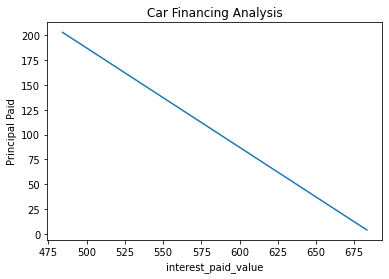

In [41]:
plt.title('Car Financing Analysis')
plt.xlabel('interest_paid_value')
plt.ylabel('Principal Paid')
plt.plot(principal_paid_value,interest_paid_value)

## Conclusion
1. Stock more of Volks Wagen and Toyota Sienna.
2. Volks Wagen was highly patronised.
3. 2.9% and 3.9% loan was highly patronised, we advise to advertise that more.
4. We also discovered that the principal paid increases with time.
5. Intrest paid decreases with time.
6. Principal paid decreases with increase in interest paid.
